In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [3]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018]])


In [4]:
from torch import optim

#optimizers require the parameter to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [5]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

#Clear the gradients , do this because gradients are accumulated
optimizer.zero_grad()

#Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0149,  0.0338,  0.0030,  ..., -0.0187,  0.0102,  0.0152],
        [ 0.0268, -0.0235, -0.0029,  ..., -0.0066,  0.0177, -0.0256],
        [-0.0166, -0.0094,  0.0173,  ...,  0.0128, -0.0040, -0.0309],
        ...,
        [-0.0334, -0.0029, -0.0045,  ...,  0.0237, -0.0032,  0.0158],
        [ 0.0217,  0.0036, -0.0299,  ..., -0.0260,  0.0161, -0.0278],
        [ 0.0023, -0.0103,  0.0283,  ..., -0.0139,  0.0264,  0.0341]],
       requires_grad=True)
Gradient -  tensor([[-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        ...,
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032]])


In [6]:
#Take an update step and few the new weights
optimizer.step()
print('Updated weight - ', model[0].weight)

Updated weight -  Parameter containing:
tensor([[ 0.0150,  0.0338,  0.0030,  ..., -0.0187,  0.0102,  0.0152],
        [ 0.0268, -0.0235, -0.0029,  ..., -0.0066,  0.0177, -0.0256],
        [-0.0166, -0.0094,  0.0173,  ...,  0.0129, -0.0040, -0.0309],
        ...,
        [-0.0335, -0.0029, -0.0045,  ...,  0.0237, -0.0032,  0.0158],
        [ 0.0217,  0.0036, -0.0299,  ..., -0.0260,  0.0161, -0.0278],
        [ 0.0023, -0.0104,  0.0283,  ..., -0.0139,  0.0263,  0.0341]],
       requires_grad=True)


In [8]:
# Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        # Forward pass, then backward pass, then update weights
        output= model(images)
        loss = criterion(output, labels)
        loss.backward()
        # Take an update step and few the new weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.915807747256273
Training loss: 0.8364984420443903
Training loss: 0.5194293756856084
Training loss: 0.43283832173294096
Training loss: 0.3901805018724155


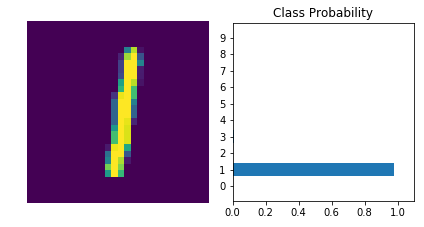

In [9]:
%matplotlib inline
import helper

images, labels= next(iter(trainloader))

img = images[0].view(1,784)
#turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
#output of the network are log-probabilities , need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1,28,28), ps)